## Python GDAL with NetCDF 
**Python:** v2.7.5 <br />
**GDAL:** v1.11.1 <br />


In [2]:
from osgeo import gdal
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fn = '/Users/kdruken/Downloads/LS8_OLI_TIRS_NBAR_3577_-10_-28_2013.nc'

### Open file

In [4]:
ds = gdal.Open(fn)

### View metadata

In [5]:
for key, value in ds.GetMetadata().items():
    print "{:35}: {}".format(key, value)

NC_GLOBAL#license                  : Creative Commons Attribution 4.0 International (CC-BY 4.0)
NC_GLOBAL#geospatial_lat_min       : -25.58404616639011
NC_GLOBAL#date_created             : 2016-04-12T11:11:39.320375
NC_GLOBAL#geospatial_lat_units     : degrees_north
NC_GLOBAL#source                   : This data is a reprojection and retile of Landsat surface reflectance scene data.
NC_GLOBAL#history                  : NetCDF-CF file created by datacube version '1.0.2' at 20160412.
NC_GLOBAL#geospatial_bounds_crs    : EPSG:4326
NC_GLOBAL#geospatial_lat_max       : -24.62761795684222
NC_GLOBAL#title                    : Experimental Data files From the Australian Geoscience Data Cube - DO NOT USE
NC_GLOBAL#geospatial_lon_min       : 121.9234014997891
NC_GLOBAL#geospatial_lon_max       : 122.9983988091495
NC_GLOBAL#Conventions              : CF-1.6, ACDD-1.3
NC_GLOBAL#geospatial_bounds        : POLYGON((122.002096767 -24.6276179568, 121.9234015 -25.517253234, 122.927490078 -25.5840461664

### View subdatasets

In [6]:
for item in ds.GetSubDatasets():
    print item[0]

NETCDF:"/Users/kdruken/Downloads/LS8_OLI_TIRS_NBAR_3577_-10_-28_2013.nc":band_6
NETCDF:"/Users/kdruken/Downloads/LS8_OLI_TIRS_NBAR_3577_-10_-28_2013.nc":band_7
NETCDF:"/Users/kdruken/Downloads/LS8_OLI_TIRS_NBAR_3577_-10_-28_2013.nc":band_4
NETCDF:"/Users/kdruken/Downloads/LS8_OLI_TIRS_NBAR_3577_-10_-28_2013.nc":band_5
NETCDF:"/Users/kdruken/Downloads/LS8_OLI_TIRS_NBAR_3577_-10_-28_2013.nc":band_2
NETCDF:"/Users/kdruken/Downloads/LS8_OLI_TIRS_NBAR_3577_-10_-28_2013.nc":band_3
NETCDF:"/Users/kdruken/Downloads/LS8_OLI_TIRS_NBAR_3577_-10_-28_2013.nc":band_1
NETCDF:"/Users/kdruken/Downloads/LS8_OLI_TIRS_NBAR_3577_-10_-28_2013.nc":extra_metadata


### Extract/view data subdataset
This follows the same input form as with 'gdalinfo': "NETCDF:file:variable"

Alternatively, the GetSubDatasets() function can be used to grab this information. 

In [7]:
band2 = gdal.Open(ds.GetSubDatasets()[4][0])

In [8]:
print 'Band shape (T, Y, X): ', (band2.RasterCount, band2.RasterYSize, band2.RasterXSize)

Band shape (T, Y, X):  (61, 4000, 4000)


#### The GetMetadata() function can be used on the subdataset
**Note:** The variable metadata is not as user-friendly as with other netcdf python tools (e.g., netCDF4, h5py)

In [9]:
band2.GetMetadata()['band_2#long_name']

'Nadir BRDF Adjusted Reflectance 0.45-0.51 microns (Blue)'

#### Use the 'GetProjection' to check whether the variable's CRS information is readable by GDAL

In [10]:
band2.GetProjection()

'PROJCS["GDA94 / Australian Albers",GEOGCS["GDA94",DATUM["Geocentric_Datum_of_Australia_1994",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6283"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.01745329251994328,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4283"]],UNIT["metre",1,AUTHORITY["EPSG","9001"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["standard_parallel_1",-18],PARAMETER["standard_parallel_2",-36],PARAMETER["latitude_of_center",0],PARAMETER["longitude_of_center",132],PARAMETER["false_easting",0],PARAMETER["false_northing",0],AUTHORITY["EPSG","3577"],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

#### Extract/plot subdataset

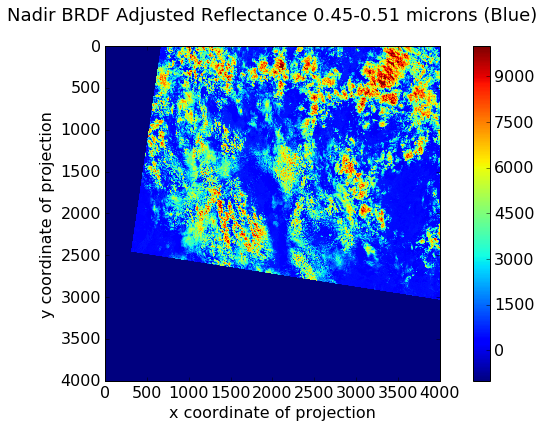

In [11]:
# Set figure size
plt.figure(figsize=(12,6))

# Plot data subset with equal axes and colorbar
plt.imshow(band2.ReadAsArray()[0,:,:])
cbar = plt.colorbar()

# Add figure title and labels
plt.title(band2.GetMetadata()['band_2#long_name']+'\n', fontsize=18)
plt.xlabel(band2.GetMetadata()['x#long_name'], fontsize=16)
plt.ylabel(band2.GetMetadata()['y#long_name'], fontsize=16)

# Adjust tick mark size
cbar.ax.tick_params(labelsize=16) 
plt.tick_params(labelsize=16)